In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from cubist import Cubist


# Load dataset (replace 'data.csv' with the actual dataset file)

In [69]:
wet_chemistry_data = pd.read_csv('./curr/ossl_soillab_L0_v1.2.csv')
spectral_data = pd.read_csv('./curr/ossl_mir_L0_v1.2.csv')

/var/folders/rn/fbg5b19n6759xrg6__m9p_sr0000gn/T/ipykernel_15259/2111290830.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  wet_chemistry_data = pd.read_csv('./curr/ossl_soillab_L0_v1.2.csv')
/var/folders/rn/fbg5b19n6759xrg6__m9p_sr0000gn/T/ipykernel_15259/2111290830.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  spectral_data = pd.read_csv('./curr/ossl_mir_L0_v1.2.csv')


In [70]:
wet_chemistry_data.head()

,dataset.code_ascii_txt,id.layer_uuid_txt,acidity_usda.a795_cmolc.kg,aggstb_usda.a1_w.pct,al.dith_usda.a65_w.pct,al.ext_aquaregia_g.kg,al.ext_usda.a1056_mg.kg,al.ext_usda.a69_cmolc.kg,al.ox_usda.a59_w.pct,awc.33.1500kPa_usda.c80_w.frac,...,sand.tot_usda.c60_w.pct,silt.tot_iso.11277_w.pct,silt.tot_usda.c407_w.pct,silt.tot_usda.c62_w.pct,wr.10kPa_usda.a414_w.pct,wr.10kPa_usda.a8_w.pct,wr.1500kPa_usda.a417_w.pct,wr.33kPa_usda.a415_w.pct,wr.33kPa_usda.a9_w.pct,zn.ext_usda.a1073_mg.kg
0,AFSIS1.SSL,ded584d70bf0474202d30e575ae24784,NaN,NaN,NaN,NaN,1270.0,NaN,NaN,NaN,...,50.37,NaN,NaN,18.64,NaN,NaN,NaN,NaN,NaN,1.03
1,AFSIS1.SSL,7c080e182bc23e19747629f46edbc6c4,NaN,NaN,NaN,NaN,1140.0,NaN,NaN,NaN,...,53.20,NaN,NaN,11.75,NaN,NaN,NaN,NaN,NaN,0.57
2,AFSIS1.SSL,03bbd570dfd399bfd866ebcdf860de39,NaN,NaN,NaN,NaN,1020.0,NaN,NaN,NaN,...,54.36,NaN,NaN,16.08,NaN,NaN,NaN,NaN,NaN,1.92
3,AFSIS1.SSL,887d316328ef950eeca33293bfe052bf,NaN,NaN,NaN,NaN,1080.0,NaN,NaN,NaN,...,54.56,NaN,NaN,10.22,NaN,NaN,NaN,NaN,NaN,0.64
4,AFSIS1.SSL,ca03ce6e439b1909c5a4a771c0afa951,NaN,NaN,NaN,NaN,877.0,NaN,NaN,NaN,...,52.36,NaN,NaN,16.81,NaN,NaN,NaN,NaN,NaN,1.00


## Merging the two dataset

In [71]:
merged_data = pd.merge(wet_chemistry_data, spectral_data, on='id.layer_uuid_txt')


In [72]:
merged_data.head()

,dataset.code_ascii_txt_x,id.layer_uuid_txt,acidity_usda.a795_cmolc.kg,aggstb_usda.a1_w.pct,al.dith_usda.a65_w.pct,al.ext_aquaregia_g.kg,al.ext_usda.a1056_mg.kg,al.ext_usda.a69_cmolc.kg,al.ox_usda.a59_w.pct,awc.33.1500kPa_usda.c80_w.frac,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
0,AFSIS1.SSL,ded584d70bf0474202d30e575ae24784,NaN,NaN,NaN,NaN,1270.0,NaN,NaN,NaN,...,0.35678,0.35664,0.35578,0.35474,0.35410,0.35366,0.35324,0.35292,0.35255,0.35205
1,AFSIS1.SSL,7c080e182bc23e19747629f46edbc6c4,NaN,NaN,NaN,NaN,1140.0,NaN,NaN,NaN,...,0.35840,0.35814,0.35714,0.35598,0.35524,0.35472,0.35422,0.35382,0.35338,0.35280
2,AFSIS1.SSL,03bbd570dfd399bfd866ebcdf860de39,NaN,NaN,NaN,NaN,1020.0,NaN,NaN,NaN,...,0.37252,0.37234,0.37142,0.37034,0.36968,0.36924,0.36881,0.36847,0.36808,0.36756
3,AFSIS1.SSL,887d316328ef950eeca33293bfe052bf,NaN,NaN,NaN,NaN,1080.0,NaN,NaN,NaN,...,0.35799,0.35773,0.35671,0.35548,0.35468,0.35414,0.35362,0.35322,0.35276,0.35216
4,AFSIS1.SSL,ca03ce6e439b1909c5a4a771c0afa951,NaN,NaN,NaN,NaN,877.0,NaN,NaN,NaN,...,0.31625,0.31609,0.31510,0.31391,0.31321,0.31276,0.31231,0.31197,0.31157,0.31104


## Removing null values

In [73]:
spectral_columns = [col for col in merged_data.columns if 'scan_mir' in col]
target_column = 'c.tot_usda.a622_w.pct'  # Adjust to the actual column name


null_spectral = merged_data[spectral_columns].isnull().sum()
null_target = merged_data[target_column].isnull().sum()

print("Null values in spectral data columns:\n", null_spectral)
print("Null values in target column:\n", null_target)

# Remove rows with null values in spectral data or target column
cleaned_data = merged_data.dropna(subset=spectral_columns + [target_column])

# Ensure the data is cleaned
print("Shape of cleaned data:", cleaned_data.shape)

Null values in spectral data columns:
 scan_mir.600_abs     49967
scan_mir.602_abs     49967
scan_mir.604_abs     49967
scan_mir.606_abs     49967
scan_mir.608_abs     49967
                     ...  
scan_mir.3992_abs    49967
scan_mir.3994_abs    49967
scan_mir.3996_abs    49967
scan_mir.3998_abs    49967
scan_mir.4000_abs    49967
Length: 1701, dtype: int64
Null values in target column:
 45422
Shape of cleaned data: (80439, 1792)


## Taking random dataset of only KSSL 

In [102]:
sampled_data = cleaned_data.loc[cleaned_data["dataset.code_ascii_txt_x"] == "KSSL.SSL"]

sampled_data = sampled_data.sample(n=3000, random_state=1)


## features and target

In [103]:
spectral_columns = [col for col in sampled_data.columns if 'scan_mir' in col]
target_column = 'c.tot_usda.a622_w.pct'  # Adjust to the actual column name

X = sampled_data[spectral_columns]
y = sampled_data[target_column]

### Split

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
y_train.head()

71170    2.02558
54233    0.26168
65676    9.96348
49448    1.59907
32905    1.02213
Name: c.tot_usda.a622_w.pct, dtype: float64

## Scaling

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train

# PLSR

In [107]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=50)
pls.fit(X_train_scaled, y_train)


PLSRegression(n_components=50)

In [112]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred = pls.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'R^2: {r2}')
print(f'PLSR Mean Squared Error: {mse}')
print(f'PLSR Root Mean Squared Error: {rms}')

R^2: 0.977779142301587
PLSR Mean Squared Error: 4.547212611222679
PLSR Root Mean Squared Error: 2.1324194266660297


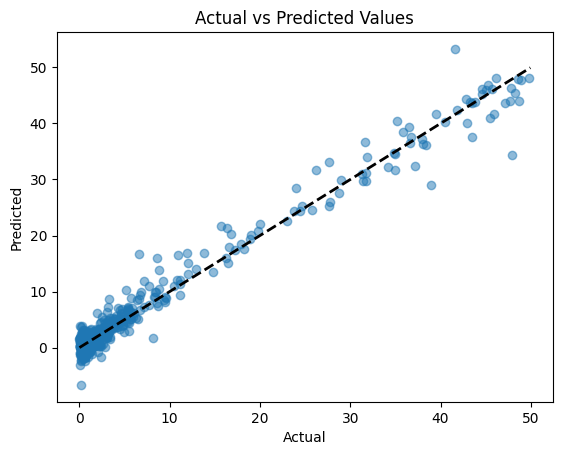

In [67]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


## Cubist

In [123]:
model = Cubist()
model.fit(X_train,y_train)

Cubist()

In [121]:
model.predict

AttributeError: 'function' object has no attribute 'predict'